# GADDS GFRM File Processing Example

This notebook demonstrates how to load, process, and visualize Bruker GADDS GFRM files using the `gadds.py` module.

## Features demonstrated:
- Loading GFRM files
- Displaying original detector image
- Converting to 2$\theta$-$\gamma$ space
- Adding gridlines for constant 2$\theta$ and $\gamma$ values
- Displaying header information

In [23]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from gadds import AreaDetectorImage
import os

# Set up matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
mpl.rcParams['mathtext.default'] = 'regular'


In [24]:
# Specify the path to your GFRM file
# Replace this with the actual path to your GFRM file
gfrm_file = r"g:\My Drive\LPS\20250709_S_MeOMBAI_prestudy_2\XRD\20250709_S_MeO\20250709_S_MeO_B01_000.gfrm"

# Alternative: use a file in the current directory if you have one
# gfrm_file = "your_file.gfrm"

# Check if file exists
if os.path.exists(gfrm_file):
    print(f"Loading file: {gfrm_file}")
else:
    print(f"File not found: {gfrm_file}")
    print("Please update the file path in the cell above")

Loading file: g:\My Drive\LPS\20250709_S_MeOMBAI_prestudy_2\XRD\20250709_S_MeO\20250709_S_MeO_B01_000.gfrm


In [25]:
# Load the GFRM file
try:
    area_detector = AreaDetectorImage(gfrm_file)
    print("Successfully loaded GFRM file!")
    print(f"Image shape: {area_detector.image.data.shape}")
    print(f"Data type: {area_detector.image.data.dtype}")
except Exception as e:
    print(f"Error loading file: {e}")
    # Create a dummy example for demonstration
    print("Creating dummy data for demonstration...")
    import fabio
    dummy_data = np.random.poisson(100, (512, 512)).astype(np.uint16)
    dummy_image = fabio.fabioimage.FabioImage(data=dummy_data)
    
    # Add dummy headers to simulate a GFRM file
    dummy_image.header = {
        'TYPE': 'UNWARPED',
        'ANGLES': '20.0 0.0 0.0',
        'CENTER': '256.0 256.0 256.0 256.0',
        'DETTYPE': 'CCD-PXL-2K 56.02 0.8',
        'DISTANC': '10.0',
        'LINEAR': '1.0 0.0'
    }
    
    area_detector = AreaDetectorImage(dummy_image)
    area_detector.load_headers()
    print("Dummy data created for demonstration")

Successfully loaded GFRM file!
Image shape: (2048, 2048)
Data type: uint16


In [26]:
# Display header information
print("=== GFRM File Header Information ===")
if hasattr(area_detector.image, 'header'):
    for key, value in area_detector.image.header.items():
        print(f"{key}: {value}")
else:
    print("No header information available")

print("\n=== Processed Parameters ===")
print(f"Alpha (2θ center): {np.rad2deg(area_detector.alpha):.2f}°")
print(f"Distance: {area_detector.distance:.2f} cm")
print(f"Detector center (x, y): {area_detector.centerXY}")
print(f"Pixel density (x, y): {area_detector.densityXY} pixels/cm")
print(f"Scale factor: {area_detector.scale}")
print(f"Offset: {area_detector.offset}")

=== GFRM File Header Information ===
FORMAT: 86
VERSION: 8
HDRBLKS: 15
TYPE: UNWARPED
SITE: Bruker AXS Inc
MODEL: D8
USER: UC Berkeley
SAMPLE: Corundum
SETNAME: 20250709_S_MeO
RUN: 14257
SAMPNUM: 0
TITLE: 20250709_S_MeO
20250709_S_MeO






NCOUNTS: 4655316
NOVERFL: 1453
MINIMUM: 0
MAXIMUM: 1085
NONTIME: 4831105
NLATE: 0
FILENAM: 
CREATED: 07/11/25   14:45:04
CUMULAT: 300.0000000
ELAPSDR: 300.0000000
ELAPSDA: 300.0000000
OSCILLA: 2
NSTEPS: 1
RANGE: 10.0000000
START: -10.0000000
INCREME: 0.0000000
NUMBER: 1
NFRAMES: 2
ANGLES: 20.0000000     5.0000000     0.0000000    90.0000000
NOVER64: 370
NPIXELB: 1
NROWS: 2048
NCOLS: 2048
WORDORD: 0
LONGORD: 0
TARGET: Co
SOURCEK: 35.0000000
SOURCEM: 40.0000000
FILTER: Parallel, Graphite
CELL: 1.0000000     1.0000000     1.0000000    90.0000000    90.0000000
90.0000000
MATRIX: 1.0000000     0.0000000     0.0000000     0.0000000     1.0000000
0.0000000     0.0000000     0.0000000     1.0000000
LOWTEMP: 0
ZOOM: 0.0000000     0.0000000     1.0000000
CENT

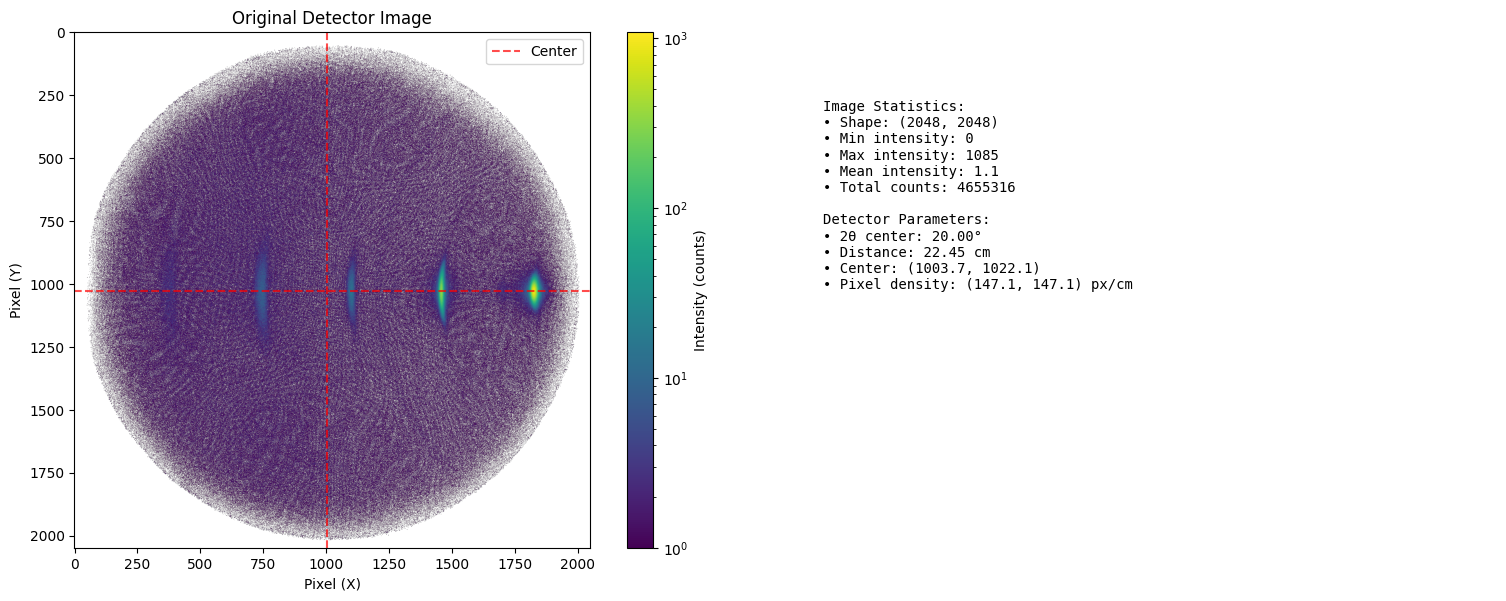

In [27]:
# Plot the original detector image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original image
im1 = ax1.imshow(area_detector.image.data, 
                 cmap='viridis',
                 norm=colors.LogNorm(vmin=1, vmax=np.max(area_detector.image.data)),
                 origin='upper')
ax1.set_title('Original Detector Image')
ax1.set_xlabel('Pixel (X)')
ax1.set_ylabel('Pixel (Y)')

# Add center cross
cx, cy = area_detector.centerXY
ax1.axhline(y=area_detector.image.shape[0] - cy, color='red', linestyle='--', alpha=0.7, label='Center')
ax1.axvline(x=cx, color='red', linestyle='--', alpha=0.7)
ax1.legend()

plt.colorbar(im1, ax=ax1, label='Intensity (counts)')

# Show statistics
ax2.axis('off')
stats_text = f"""
Image Statistics:
• Shape: {area_detector.image.data.shape}
• Min intensity: {np.min(area_detector.image.data)}
• Max intensity: {np.max(area_detector.image.data)}
• Mean intensity: {np.mean(area_detector.image.data):.1f}
• Total counts: {np.sum(area_detector.image.data)}

Detector Parameters:
• 2θ center: {np.rad2deg(area_detector.alpha):.2f}°
• Distance: {area_detector.distance:.2f} cm
• Center: ({area_detector.centerXY[0]:.1f}, {area_detector.centerXY[1]:.1f})
• Pixel density: ({area_detector.densityXY[0]:.1f}, {area_detector.densityXY[1]:.1f}) px/cm
"""
ax2.text(0.1, 0.9, stats_text, transform=ax2.transAxes, 
         verticalalignment='top', fontfamily='monospace', fontsize=10)

plt.tight_layout()
plt.show()

In [28]:
# Convert the image to 2θ-γ space
print("Converting to 2θ-γ space...")
area_detector.convert(n_twoth=512, n_gamma=512)
print(f"Converted image shape: {area_detector.data_converted.shape}")
print(f"2θ range: {np.rad2deg(area_detector.limits[0]):.2f}° to {np.rad2deg(area_detector.limits[1]):.2f}°")
print(f"γ range: {np.rad2deg(area_detector.limits[2]):.2f}° to {np.rad2deg(area_detector.limits[3]):.2f}°")

Converting to 2θ-γ space...
Converted image shape: (512, 512)
2θ range: 2.46° to 39.97°
γ range: -171.75° to -8.29°


Adding gridlines for 2θ values: [ 2.  7. 12. 17. 22. 27. 32. 37.]°


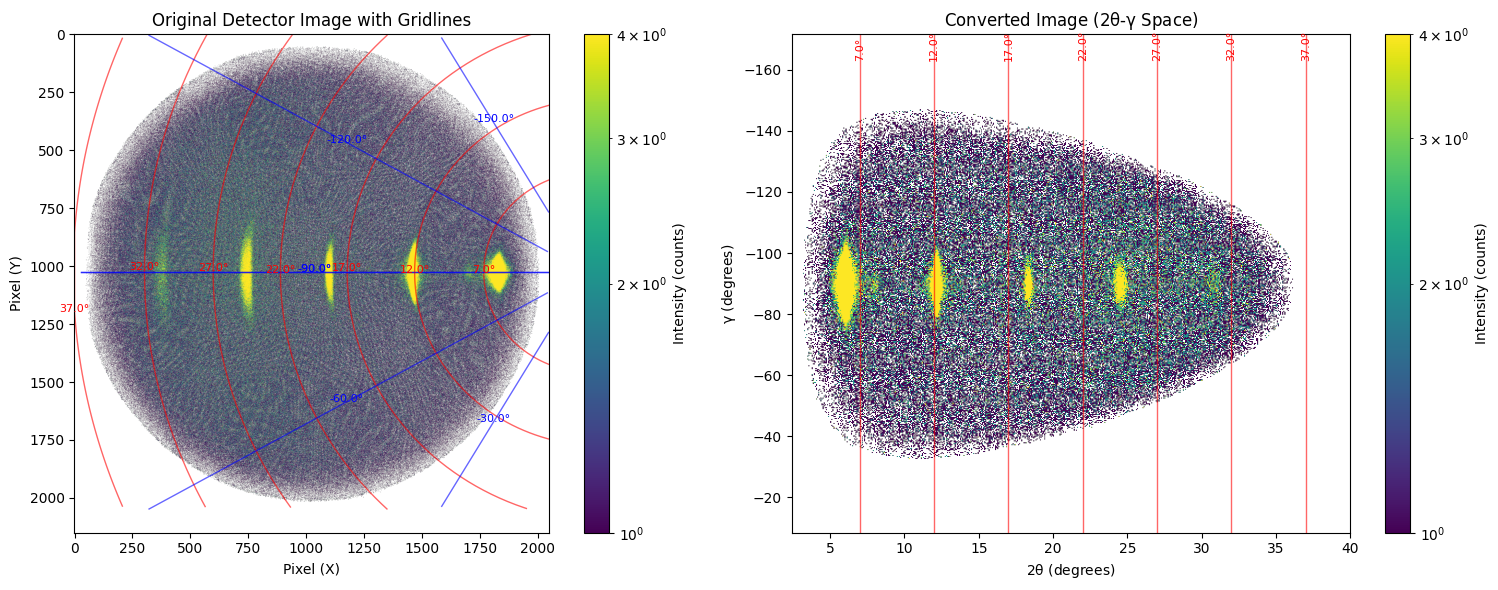

In [29]:
# Plot both original and converted images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Original detector image with gridlines
im1 = ax1.imshow(area_detector.image.data, 
                 cmap='viridis',
                 norm=colors.LogNorm(vmin=1, vmax=np.percentile(area_detector.image.data, 99)),
                 origin='upper')
ax1.set_title('Original Detector Image with Gridlines')
ax1.set_xlabel('Pixel (X)')
ax1.set_ylabel('Pixel (Y)')

theta_min, theta_max, gamma_min, gamma_max = np.rad2deg(area_detector.limits)

# Add gridlines for constant 2θ values
twoth_values = np.arange(*np.round([theta_min, theta_max]), 5)  # degrees
print(f"Adding gridlines for 2θ values: {twoth_values}°")
# twoth_values = [10, 15, 20, 25, 30, 35, 40]  # degrees
for twoth in twoth_values:
    if area_detector.limits[0] <= np.deg2rad(twoth) <= area_detector.limits[1]:
        x_grid, y_grid = area_detector.gridline(twoth, axis='twoth', delta_deg=0.5)
        if len(x_grid) > 0:
            ax1.plot(x_grid, y_grid, 'r-', alpha=0.6, linewidth=1)
            # Add label
            if len(x_grid) > 10:
                mid_idx = len(x_grid) // 2
                ax1.text(x_grid[mid_idx], y_grid[mid_idx], f'{twoth}°', 
                        color='red', fontsize=8, ha='center')

# Add gridlines for constant γ values
gamma_values = [*np.arange(*np.round([-90, gamma_min]), -30), *np.arange(*np.round([-90, gamma_max]), 30)]  # degrees
for gamma in gamma_values:
    if area_detector.limits[2] <= np.deg2rad(gamma) <= area_detector.limits[3]:
        x_grid, y_grid = area_detector.gridline(gamma, axis='gamma', delta_deg=0.5)
        if len(x_grid) > 0:
            ax1.plot(x_grid, y_grid, 'b-', alpha=0.6, linewidth=1)
            # Add label
            if len(x_grid) > 10:
                mid_idx = len(x_grid) // 2
                ax1.text(x_grid[mid_idx], y_grid[mid_idx], f'{gamma}°', 
                        color='blue', fontsize=8, ha='center')

plt.colorbar(im1, ax=ax1, label='Intensity (counts)')

# Converted image in 2θ-γ space
dx = area_detector.indexes[1][1] - area_detector.indexes[1][0]
dy = area_detector.indexes[0][1] - area_detector.indexes[0][0]
extent = (
    area_detector.indexes[1][0] - dx/2, area_detector.indexes[1][-1] + dx/2,
    area_detector.indexes[0][-1] - dy/2, area_detector.indexes[0][0] + dy/2
)

im2 = ax2.imshow(area_detector.data_converted,
                 cmap='viridis',
                 norm=colors.LogNorm(vmin=1, vmax=np.percentile(area_detector.data_converted, 99)),
                 origin='upper',
                 extent=extent,
                 aspect='auto')
ax2.set_title('Converted Image (2$\\theta$-$\\gamma$ Space)')
ax2.set_xlabel('2$\\theta$ (degrees)')
ax2.set_ylabel('$\\gamma$ (degrees)')

# Add grid for constant 2θ and γ
for twoth in twoth_values:
    if extent[0] <= twoth <= extent[1]:
        ax2.axvline(x=twoth, color='red', alpha=0.6, linewidth=1)
        ax2.text(twoth, extent[3] - (extent[3] - extent[2]) * 0.05, f'{twoth}°', 
                color='red', fontsize=8, ha='center', rotation=90)

for gamma in gamma_values:
    if extent[2] <= gamma <= extent[3]:
        ax2.axhline(y=gamma, color='blue', alpha=0.6, linewidth=1)
        ax2.text(extent[0] + (extent[1] - extent[0]) * 0.02, gamma, f'{gamma}°', 
                color='blue', fontsize=8, va='center')

plt.colorbar(im2, ax=ax2, label='Intensity (counts)')

plt.tight_layout()
plt.show()

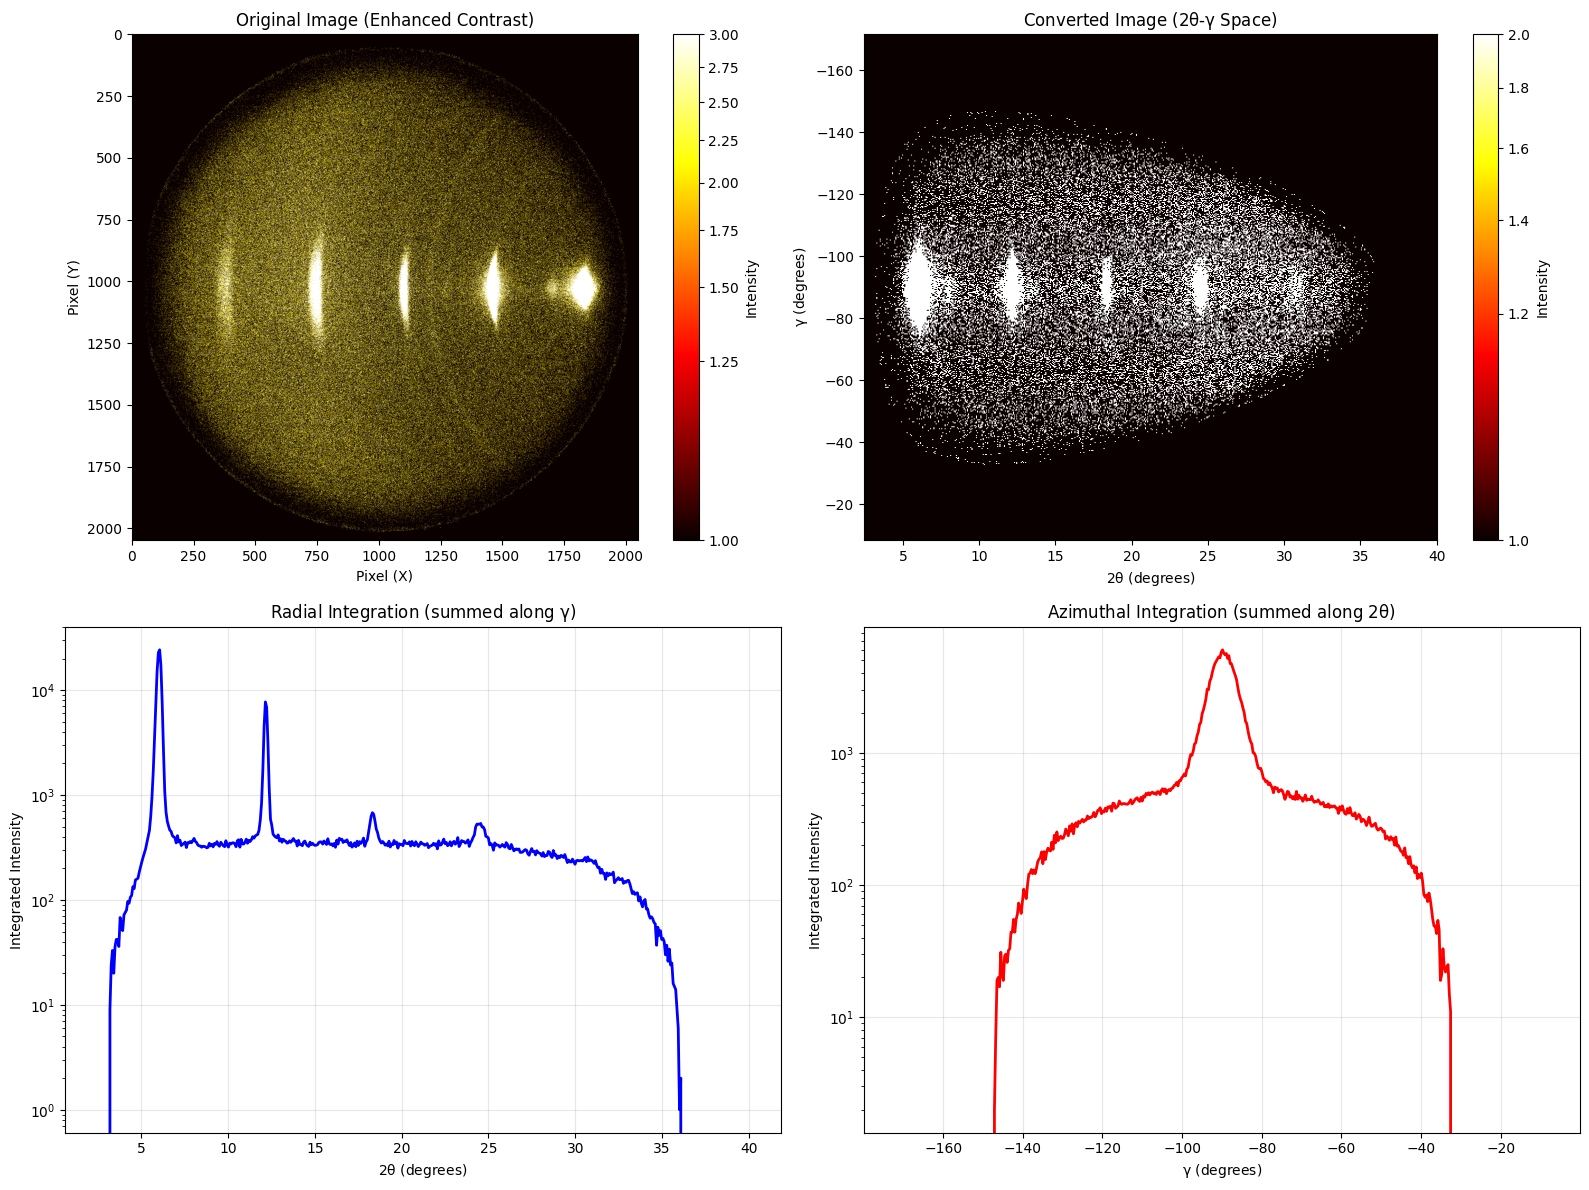

In [30]:
# Create a more detailed analysis plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Original image with enhanced contrast
im1 = axes[0,0].imshow(area_detector.image.data, 
                       cmap='hot',
                       norm=colors.PowerNorm(gamma=0.5, vmin=1, vmax=np.percentile(area_detector.image.data, 95)),
                       origin='upper')
axes[0,0].set_title('Original Image (Enhanced Contrast)')
axes[0,0].set_xlabel('Pixel (X)')
axes[0,0].set_ylabel('Pixel (Y)')
plt.colorbar(im1, ax=axes[0,0], label='Intensity')

# 2. Converted image
im2 = axes[0,1].imshow(area_detector.data_converted,
                       cmap='hot',
                       norm=colors.PowerNorm(gamma=0.5, vmin=1, vmax=np.percentile(area_detector.data_converted, 95)),
                       origin='upper',
                       extent=extent,
                       aspect='auto')
axes[0,1].set_title('Converted Image (2$\\theta$-$\\gamma$ Space)')
axes[0,1].set_xlabel('2$\\theta$ (degrees)')
axes[0,1].set_ylabel('$\\gamma$ (degrees)')
plt.colorbar(im2, ax=axes[0,1], label='Intensity')

# 3. Radial integration (sum along γ)
radial_profile = np.sum(area_detector.data_converted, axis=0)
axes[1,0].plot(area_detector.indexes[1], radial_profile, 'b-', linewidth=2)
axes[1,0].set_title('Radial Integration (summed along $\\gamma$)')
axes[1,0].set_xlabel('2$\\theta$ (degrees)')
axes[1,0].set_ylabel('Integrated Intensity')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_yscale('log')

# 4. Azimuthal integration (sum along 2θ)
azimuthal_profile = np.sum(area_detector.data_converted, axis=1)
axes[1,1].plot(area_detector.indexes[0], azimuthal_profile, 'r-', linewidth=2)
axes[1,1].set_title('Azimuthal Integration (summed along 2$\\theta$)')
axes[1,1].set_xlabel('$\\gamma$ (degrees)')
axes[1,1].set_ylabel('Integrated Intensity')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

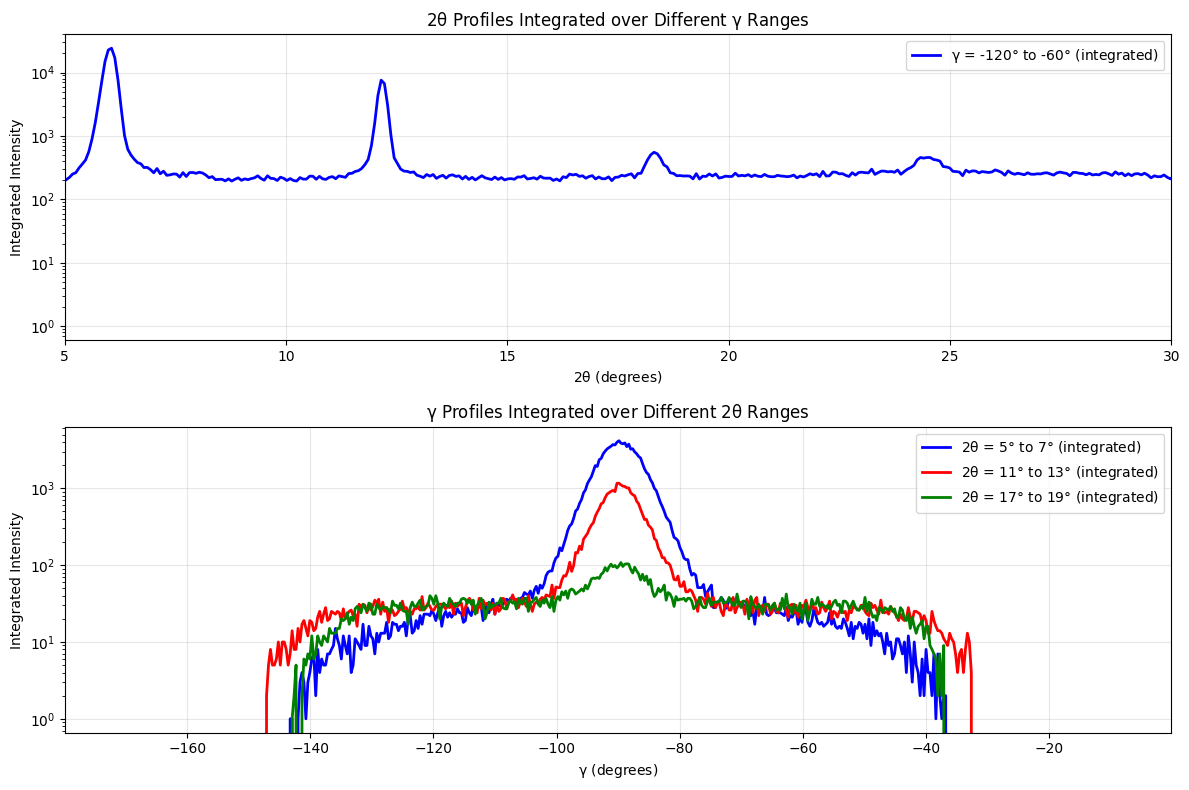

In [31]:
# Extract and display specific 2θ cuts
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Extract data by integrating over γ ranges (each tuple defines a range to integrate)
gamma_ranges = [(-120, -60)]  # degrees - ranges to integrate over
colors_list = ['blue', 'red', 'green']

for i, (gamma_min, gamma_max) in enumerate(gamma_ranges):
    # Find γ indices corresponding to the range
    gamma_mask = (area_detector.indexes[0] >= gamma_min) & (area_detector.indexes[0] <= gamma_max)
    gamma_indices = np.where(gamma_mask)[0]
    
    if len(gamma_indices) > 0:
        # Integrate (sum) over the γ range
        intensity_slice = np.sum(area_detector.data_converted[gamma_indices, :], axis=0)
        
        axes[0].plot(area_detector.indexes[1], intensity_slice, 
                     color=colors_list[i], linewidth=2, 
                     label=f'$\\gamma$ = {gamma_min}° to {gamma_max}° (integrated)')

axes[0].set_title('2$\\theta$ Profiles Integrated over Different $\\gamma$ Ranges')
axes[0].set_xlabel('2$\\theta$ (degrees)')
axes[0].set_ylabel('Integrated Intensity')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')
axes[0].set_xlim(5, 30)
axes[0].autoscale(axis='y')

# Extract data by integrating over 2θ ranges (each tuple defines a range to integrate)
twoth_ranges = [(5, 7), (11, 13), (17, 19)]  # degrees - ranges to integrate over

for i, (twoth_min, twoth_max) in enumerate(twoth_ranges):
    # Find 2θ indices corresponding to the range
    twoth_mask = (area_detector.indexes[1] >= twoth_min) & (area_detector.indexes[1] <= twoth_max)
    twoth_indices = np.where(twoth_mask)[0]
    
    if len(twoth_indices) > 0:
        # Integrate (sum) over the 2θ range
        intensity_slice = np.sum(area_detector.data_converted[:, twoth_indices], axis=1)
        
        axes[1].plot(area_detector.indexes[0], intensity_slice, 
                     color=colors_list[i], linewidth=2, 
                     label=f'2$\\theta$ = {twoth_min}° to {twoth_max}° (integrated)')

axes[1].set_title('$\\gamma$ Profiles Integrated over Different 2$\\theta$ Ranges')
axes[1].set_xlabel('$\\gamma$ (degrees)')
axes[1].set_ylabel('Integrated Intensity')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

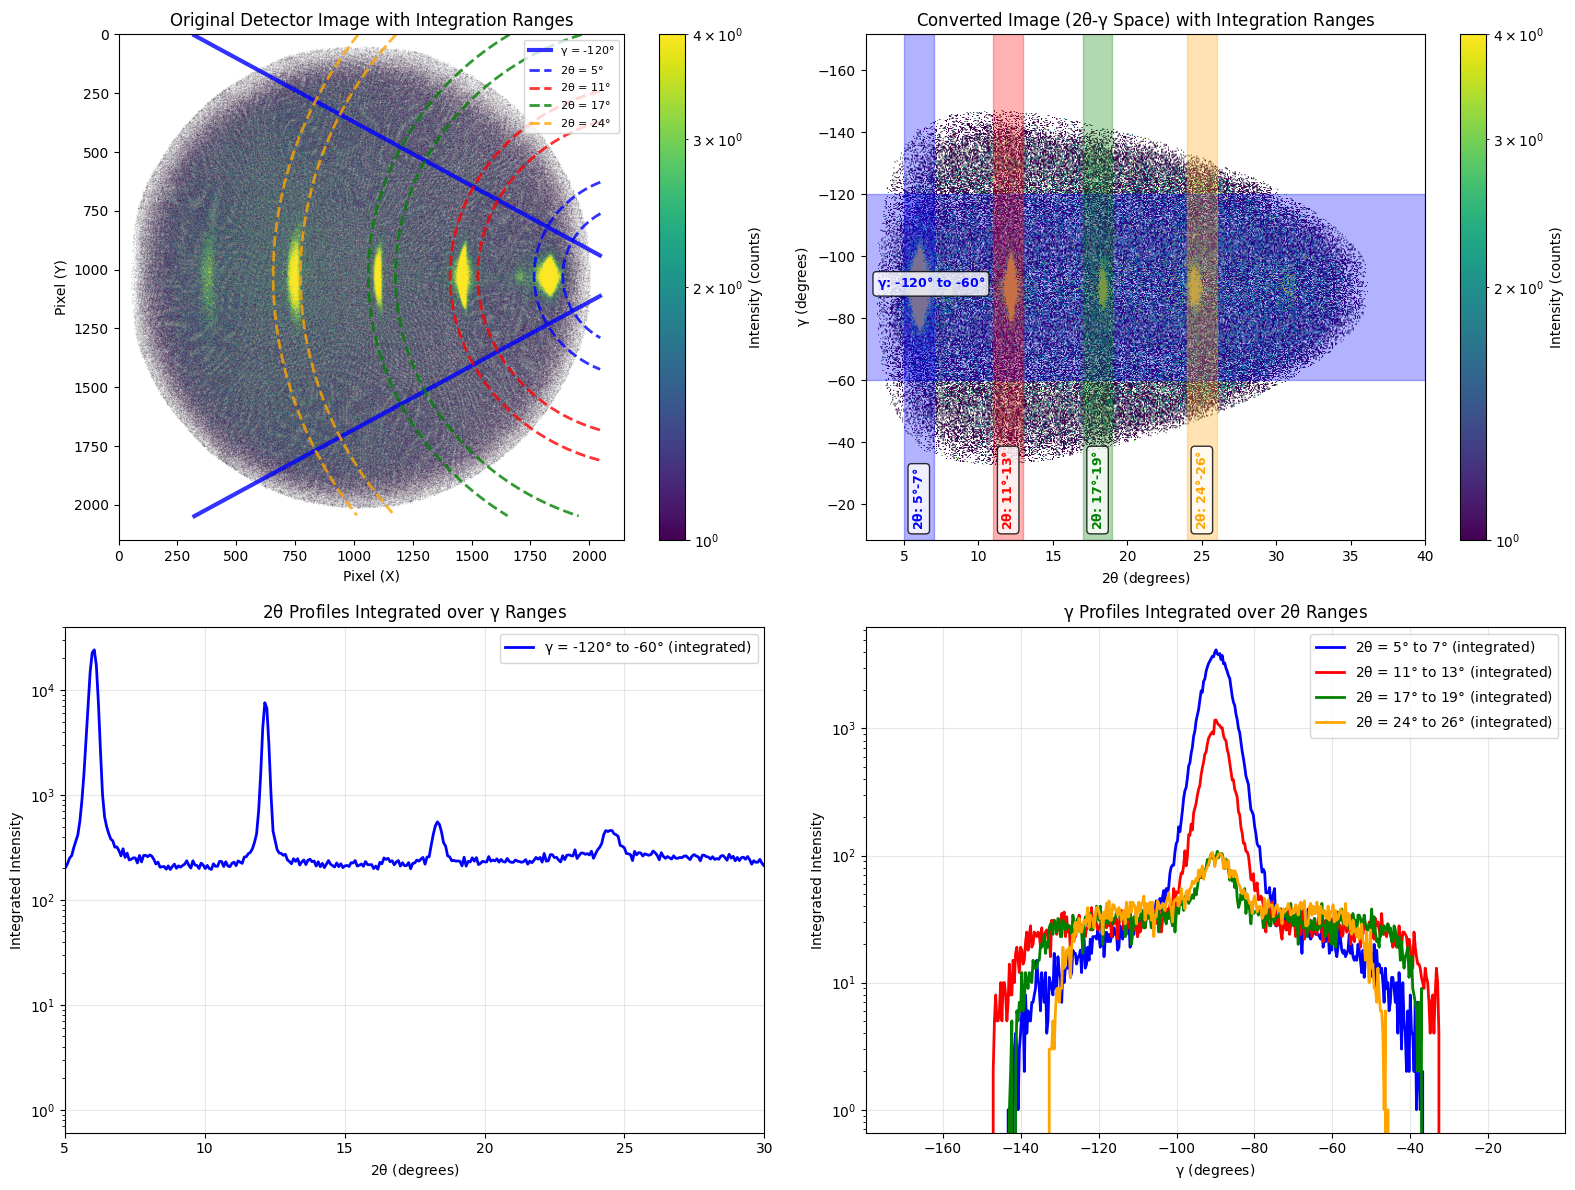

Comprehensive visualization complete:
• Top-left: Original detector image with integration ranges mapped as curves
• Top-right: Converted 2θ-γ image with integration ranges as bands
• Bottom-left: 2θ profiles integrated over γ ranges: [(-120, -60)]
• Bottom-right: γ profiles integrated over 2θ ranges: [(5, 7), (11, 13), (17, 19), (24, 26)]
Integration ranges are color-coded consistently across all plots.


In [33]:
# Comprehensive visualization: original detector, converted image, and integration profiles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define integration ranges (same as used in profile extraction)
gamma_ranges = [(-120, -60)]  # degrees - ranges to integrate over
twoth_ranges = [(5, 7), (11, 13), (17, 19), (24, 26)]  # degrees - ranges to integrate over
colors_list = ['blue', 'red', 'green', 'orange']

# 1. Original detector image with integration ranges mapped back to pixel coordinates
im1 = axes[0,0].imshow(area_detector.image.data, 
                       cmap='viridis',
                       norm=colors.LogNorm(vmin=1, vmax=np.percentile(area_detector.image.data, 99)),
                       origin='upper')
axes[0,0].set_title('Original Detector Image with Integration Ranges')
axes[0,0].set_xlabel('Pixel (X)')
axes[0,0].set_ylabel('Pixel (Y)')

# Map γ ranges back to detector coordinates and draw as curves
for i, (gamma_min, gamma_max) in enumerate(gamma_ranges):
    # Create curves for γ boundaries
    for gamma_val in [gamma_min, gamma_max]:
        x_grid, y_grid = area_detector.gridline(gamma_val, axis='gamma', delta_deg=0.2)
        if len(x_grid) > 0:
            axes[0,0].plot(x_grid, y_grid, color=colors_list[i], linewidth=3, alpha=0.8,
                          label=f'$\\gamma$ = {gamma_val}°' if gamma_val == gamma_min else None)

# Map 2θ ranges back to detector coordinates
for i, (twoth_min, twoth_max) in enumerate(twoth_ranges):
    # Create curves for 2θ boundaries
    for twoth_val in [twoth_min, twoth_max]:
        x_grid, y_grid = area_detector.gridline(twoth_val, axis='twoth', delta_deg=0.2)
        if len(x_grid) > 0:
            axes[0,0].plot(x_grid, y_grid, color=colors_list[i], linewidth=2, alpha=0.8, linestyle='--',
                          label=f'2$\\theta$ = {twoth_val}°' if twoth_val == twoth_min else None)

axes[0,0].legend(loc='upper right', fontsize=8)
plt.colorbar(im1, ax=axes[0,0], label='Intensity (counts)')

# 2. Converted image in 2θ-γ space with integration ranges as bands
im2 = axes[0,1].imshow(area_detector.data_converted,
                       cmap='viridis',
                       norm=colors.LogNorm(vmin=1, vmax=np.percentile(area_detector.data_converted, 99)),
                       origin='upper',
                       extent=extent,
                       aspect='auto')
axes[0,1].set_title('Converted Image (2$\\theta$-$\\gamma$ Space) with Integration Ranges')
axes[0,1].set_xlabel('2$\\theta$ (degrees)')
axes[0,1].set_ylabel('$\\gamma$ (degrees)')

# Overlay γ integration ranges (horizontal bands)
for i, (gamma_min, gamma_max) in enumerate(gamma_ranges):
    axes[0,1].axhspan(gamma_min, gamma_max, alpha=0.3, color=colors_list[i], 
                      label=f'$\\gamma$ integration: {gamma_min}° to {gamma_max}°')
    
    # Add text labels
    axes[0,1].text(extent[0] + (extent[1] - extent[0]) * 0.02, 
                   (gamma_min + gamma_max) / 2, 
                   f'$\\gamma$: {gamma_min}° to {gamma_max}°',
                   color=colors_list[i], fontweight='bold', fontsize=9,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Overlay 2θ integration ranges (vertical bands)
for i, (twoth_min, twoth_max) in enumerate(twoth_ranges):
    axes[0,1].axvspan(twoth_min, twoth_max, alpha=0.3, color=colors_list[i], 
                      label=f'2$\\theta$ integration: {twoth_min}° to {twoth_max}°')
    
    # Add text labels
    axes[0,1].text((twoth_min + twoth_max) / 2, 
                   extent[2] + (extent[3] - extent[2]) * 0.02,
                   f'2$\\theta$: {twoth_min}°-{twoth_max}°',
                   color=colors_list[i], fontweight='bold', fontsize=9,
                   rotation=90, ha='center', va='bottom',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.colorbar(im2, ax=axes[0,1], label='Intensity (counts)')

# 3. 2θ Profiles integrated over γ ranges
for i, (gamma_min, gamma_max) in enumerate(gamma_ranges):
    # Find γ indices corresponding to the range
    gamma_mask = (area_detector.indexes[0] >= gamma_min) & (area_detector.indexes[0] <= gamma_max)
    gamma_indices = np.where(gamma_mask)[0]
    
    if len(gamma_indices) > 0:
        # Integrate (sum) over the γ range
        intensity_slice = np.sum(area_detector.data_converted[gamma_indices, :], axis=0)
        
        axes[1,0].plot(area_detector.indexes[1], intensity_slice, 
                       color=colors_list[i], linewidth=2, 
                       label=f'$\\gamma$ = {gamma_min}° to {gamma_max}° (integrated)')

axes[1,0].set_title('2$\\theta$ Profiles Integrated over $\\gamma$ Ranges')
axes[1,0].set_xlabel('2$\\theta$ (degrees)')
axes[1,0].set_ylabel('Integrated Intensity')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_yscale('log')
axes[1,0].set_xlim(5, 30)

# 4. γ Profiles integrated over 2θ ranges
for i, (twoth_min, twoth_max) in enumerate(twoth_ranges):
    # Find 2θ indices corresponding to the range
    twoth_mask = (area_detector.indexes[1] >= twoth_min) & (area_detector.indexes[1] <= twoth_max)
    twoth_indices = np.where(twoth_mask)[0]
    
    if len(twoth_indices) > 0:
        # Integrate (sum) over the 2θ range
        intensity_slice = np.sum(area_detector.data_converted[:, twoth_indices], axis=1)
        
        axes[1,1].plot(area_detector.indexes[0], intensity_slice, 
                       color=colors_list[i], linewidth=2, 
                       label=f'2$\\theta$ = {twoth_min}° to {twoth_max}° (integrated)')

axes[1,1].set_title('$\\gamma$ Profiles Integrated over 2$\\theta$ Ranges')
axes[1,1].set_xlabel('$\\gamma$ (degrees)')
axes[1,1].set_ylabel('Integrated Intensity')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

print("Comprehensive visualization complete:")
print(f"• Top-left: Original detector image with integration ranges mapped as curves")
print(f"• Top-right: Converted 2θ-γ image with integration ranges as bands")
print(f"• Bottom-left: 2θ profiles integrated over γ ranges: {gamma_ranges}")
print(f"• Bottom-right: γ profiles integrated over 2θ ranges: {twoth_ranges}")
print("Integration ranges are color-coded consistently across all plots.")

In [ ]:
# Summary and export options
print("=== Analysis Summary ===")
print(f"Original image shape: {area_detector.image.data.shape}")
print(f"Converted image shape: {area_detector.data_converted.shape}")
print(f"2θ range: {np.rad2deg(area_detector.limits[0]):.2f}° to {np.rad2deg(area_detector.limits[1]):.2f}°")
print(f"γ range: {np.rad2deg(area_detector.limits[2]):.2f}° to {np.rad2deg(area_detector.limits[3]):.2f}°")
print(f"Total counts (original): {np.sum(area_detector.image.data)}")
print(f"Total counts (converted): {np.sum(area_detector.data_converted)}")

# Save converted data example
print("\n=== Export Options ===")
print("To save the converted data:")
print("• np.savetxt('converted_data.txt', area_detector.data_converted)")
print("• np.save('converted_data.npy', area_detector.data_converted)")
print("• plt.imsave('converted_image.png', area_detector.data_converted, cmap='viridis')")

print("\nTo save the 2θ and γ axes:")
print("• np.savetxt('twoth_axis.txt', area_detector.indexes[1])")
print("• np.savetxt('gamma_axis.txt', area_detector.indexes[0])")

=== Analysis Summary ===
Original image shape: (2048, 2048)
Converted image shape: (512, 512)
2θ range: 2.46° to 39.97°
γ range: -171.75° to -8.29°
Total counts (original): 4655316
Total counts (converted): 257197

=== Export Options ===
To save the converted data:
• np.savetxt('converted_data.txt', area_detector.data_converted)
• np.save('converted_data.npy', area_detector.data_converted)
• plt.imsave('converted_image.png', area_detector.data_converted, cmap='viridis')

To save the 2θ and γ axes:
• np.savetxt('twoth_axis.txt', area_detector.indexes[1])
• np.savetxt('gamma_axis.txt', area_detector.indexes[0])
